# Final Project
Huang, Newton, Roy

IST 718 - Big Data Analytics

Mar 27, 2023

In [163]:
# import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from wordcloud import WordCloud, STOPWORDS
from xgboost import XGBRegressor

# format float 64 numbers for display
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
# format settings for viewing data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Word clouds

In [54]:
## prepare data for word cloud
# read in data
sanfran = pd.read_excel("airbnb_san_fran.xlsx", header = 0)

# separate sanfran dataframe by price of listings, <200, >=200 and <400, >=400 and <600, >=600 and <800, >=800
sanfran2a = sanfran[sanfran['Price'] < 200]
sanfran2b = sanfran[(sanfran['Price'] >= 200) & (sanfran['Price'] < 400)]
sanfran2c = sanfran[(sanfran['Price'] >= 400) & (sanfran['Price'] < 600)]
sanfran2d = sanfran[(sanfran['Price'] >= 600) & (sanfran['Price'] < 800)]
sanfran2e = sanfran[sanfran['Price'] >= 800]

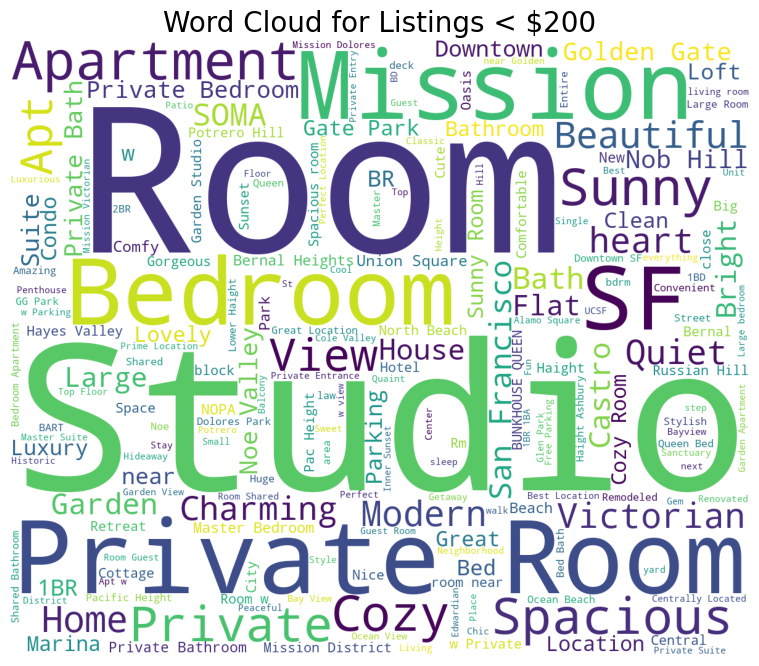

In [93]:
# make word clouds for each price range
def make_wordcloud(df, title):
    stopwords = set(STOPWORDS)
    stopwords.add('one')
    stopwords.add('two')
    stopwords.add('will')
    stopwords.add('also')
    text = df['Name'].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=1000).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# make word clouse for listings < $200
make_wordcloud(sanfran2a, 'Word Cloud for Listings < $200')

# download word cloud image as a file
wordcloud.to_file('Word Cloud for Listings < $200.png')

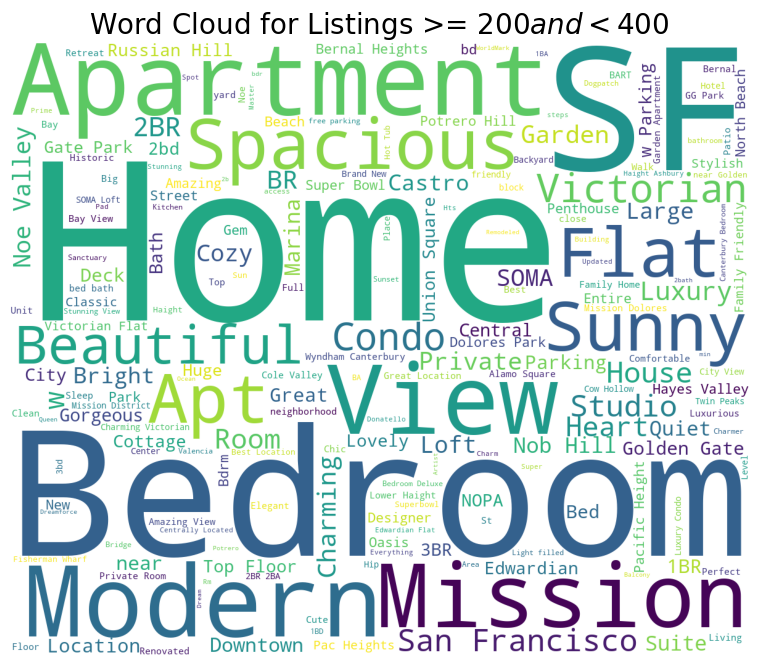

In [94]:
# make word clouse for listings >= $200 and < $400
make_wordcloud(sanfran2b, 'Word Cloud for Listings >= $200 and < $400')

# download word cloud image as a file
wordcloud.to_file('Word Cloud for Listings >= $200 and < $400.png')

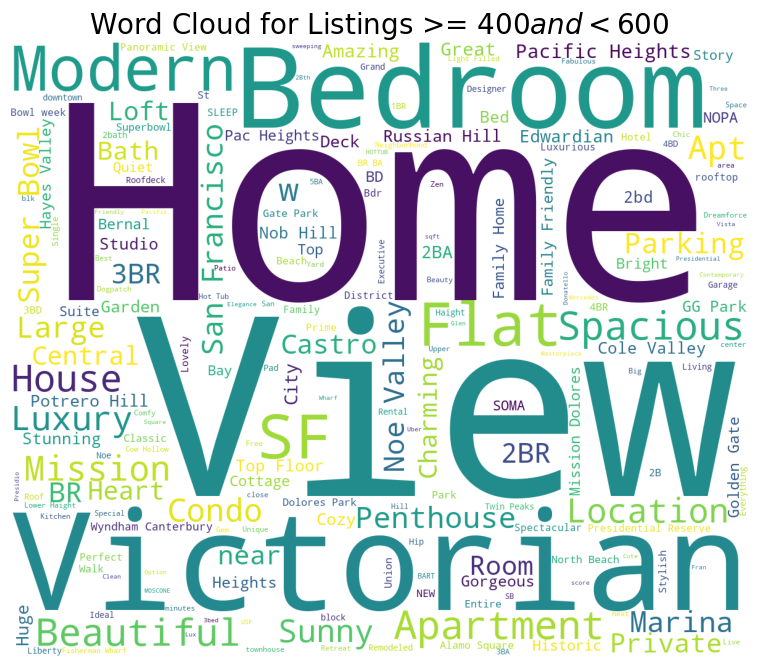

In [95]:
# make word clouse for listings >= $400 and < $600
make_wordcloud(sanfran2c, 'Word Cloud for Listings >= $400 and < $600')

# download word cloud image as a file
wordcloud.to_file('Word Cloud for Listings >= $400 and < $600.png')

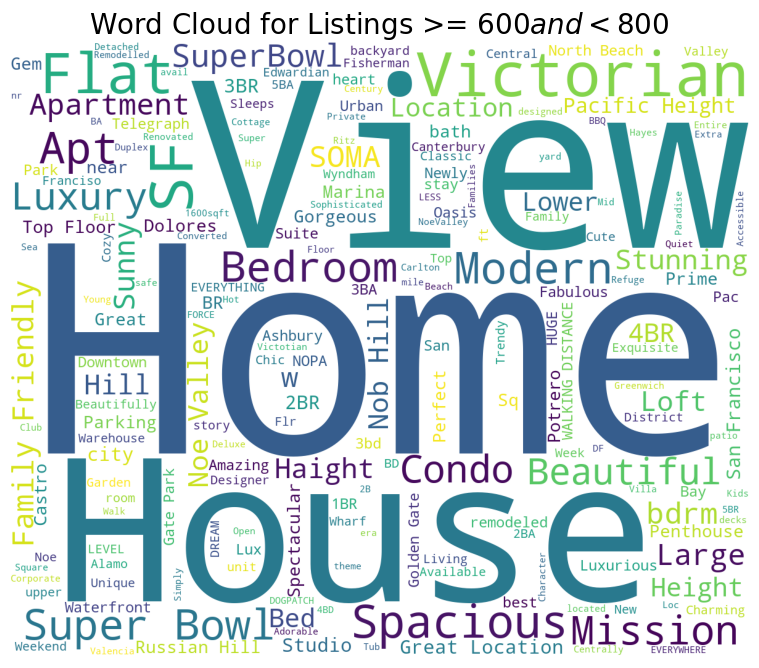

In [96]:
# make word clouse for listings >= $600 and < $800
make_wordcloud(sanfran2d, 'Word Cloud for Listings >= $600 and < $800')

# download word cloud image as a file
wordcloud.to_file('Word Cloud for Listings >= $600 and < $800.png')

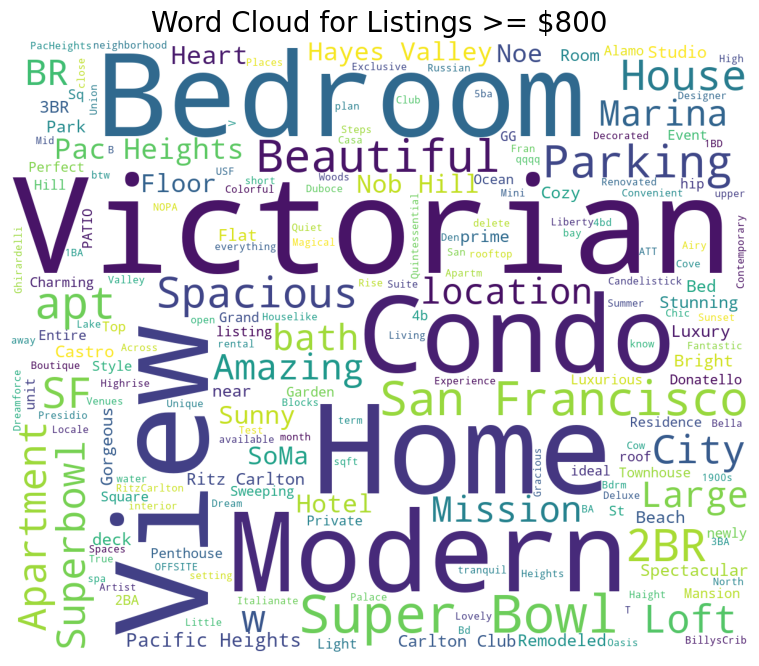

In [97]:
# make word clouse for listings >= $800
make_wordcloud(sanfran2e, 'Word Cloud for Listings >= $800')

# download word cloud image as a file
wordcloud.to_file('Word Cloud for Listings >= $800.png')

In [103]:
# tabularize the top 10 words for each price range
def top_words(df, title):
    text = df['Description'].str.cat(sep=' ')
    stopwords = set(STOPWORDS)
    stopwords.add('one')
    stopwords.add('two')
    stopwords.add('will')
    stopwords.add('also')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1200, height=1000).generate(text)
    wordcloud = wordcloud.words_
    wordcloud = pd.DataFrame.from_dict(wordcloud, orient='index')
    wordcloud = wordcloud.reset_index()
    wordcloud.columns = ['Word', 'Frequency']
    wordcloud = wordcloud.sort_values(by='Frequency', ascending=False)
    wordcloud = wordcloud.reset_index(drop=True)
    wordcloud = wordcloud.head(20)
    print(title)
    print(wordcloud)

# top 20 words for listings < $200
top_words(sanfran2a, 'Top 10 Words for Listings < $200')

Top 10 Words for Listings < $200
             Word  Frequency
0   San Francisco       1.00
1            room       0.96
2           place       0.71
3       apartment       0.63
4         bedroom       0.58
5            home       0.56
6            city       0.56
7     living room       0.55
8           house       0.53
9          access       0.52
10          guest       0.51
11          block       0.51
12          close       0.50
13        kitchen       0.46
14          space       0.44
15       bathroom       0.42
16        located       0.42
17   neighborhood       0.39
18    Golden Gate       0.37
19             SF       0.35


In [104]:
# top 20 words for listings between $200 and $400
top_words(sanfran2b, 'Top 10 Words for Listings >= $200 and < $400')

Top 10 Words for Listings >= $200 and < $400
             Word  Frequency
0   San Francisco       1.00
1         bedroom       0.85
2            home       0.69
3       apartment       0.65
4            city       0.56
5     living room       0.55
6           block       0.53
7           place       0.50
8         kitchen       0.48
9    neighborhood       0.47
10          close       0.42
11         access       0.42
12          house       0.42
13          guest       0.39
14        located       0.39
15             SF       0.38
16       bathroom       0.38
17           room       0.37
18          space       0.37
19      beautiful       0.37


In [105]:
# top 20 words for listings between $400 and $600
top_words(sanfran2c, 'Top 10 Words for Listings >= $400 and < $600')

Top 10 Words for Listings >= $400 and < $600
             Word  Frequency
0         bedroom       1.00
1   San Francisco       0.92
2            home       0.81
3         kitchen       0.69
4           block       0.60
5           house       0.58
6           large       0.57
7            city       0.56
8     living room       0.54
9       apartment       0.53
10           room       0.53
11   neighborhood       0.51
12           view       0.45
13     restaurant       0.44
14       bathroom       0.43
15         access       0.43
16             SF       0.42
17      beautiful       0.42
18          great       0.41
19        located       0.38


In [106]:
# top 20 words for listings between $600 and $800
top_words(sanfran2d, 'Top 10 Words for Listings >= $600 and < $800')

Top 10 Words for Listings >= $600 and < $800
             Word  Frequency
0         bedroom       1.00
1            home       0.86
2   San Francisco       0.78
3           large       0.63
4            view       0.60
5         kitchen       0.59
6           house       0.58
7           space       0.55
8    neighborhood       0.54
9        bathroom       0.52
10           city       0.48
11      apartment       0.48
12        located       0.47
13      available       0.43
14           room       0.42
15         Street       0.41
16          block       0.39
17        private       0.39
18    living room       0.39
19      beautiful       0.39


In [107]:
# top 20 words for listings over $800
top_words(sanfran2e, 'Top 10 Words for Listings >= $800')

Top 10 Words for Listings >= $800
             Word  Frequency
0   San Francisco       1.00
1            home       0.98
2         bedroom       0.75
3            view       0.73
4      restaurant       0.71
5            room       0.70
6         kitchen       0.65
7            city       0.57
8           great       0.55
9           house       0.52
10         access       0.51
11          space       0.50
12          large       0.48
13          block       0.48
14      apartment       0.46
15      beautiful       0.45
16         Street       0.45
17   neighborhood       0.45
18             SF       0.41
19          guest       0.41


## Prepare data for initial analysis

In [42]:
# OBTAIN
# read in comma-delimited text file and create data frame
sanfran = pd.read_excel("airbnb_san_fran.xlsx", header = 0)

# EXPLORE dataframe
print(sanfran.shape)

# EXPLORE dataframe
sanfran.info()

(8680, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              8680 non-null   int64         
 1   Listing Url                     8680 non-null   object        
 2   Scrape ID                       8680 non-null   int64         
 3   Last Scraped                    8680 non-null   datetime64[ns]
 4   Name                            8680 non-null   object        
 5   Summary                         8409 non-null   object        
 6   Space                           6205 non-null   object        
 7   Description                     8678 non-null   object        
 8   Experiences Offered             8680 non-null   object        
 9   Neighborhood Overview           5170 non-null   object        
 10  Notes                           4125 non-null   object       

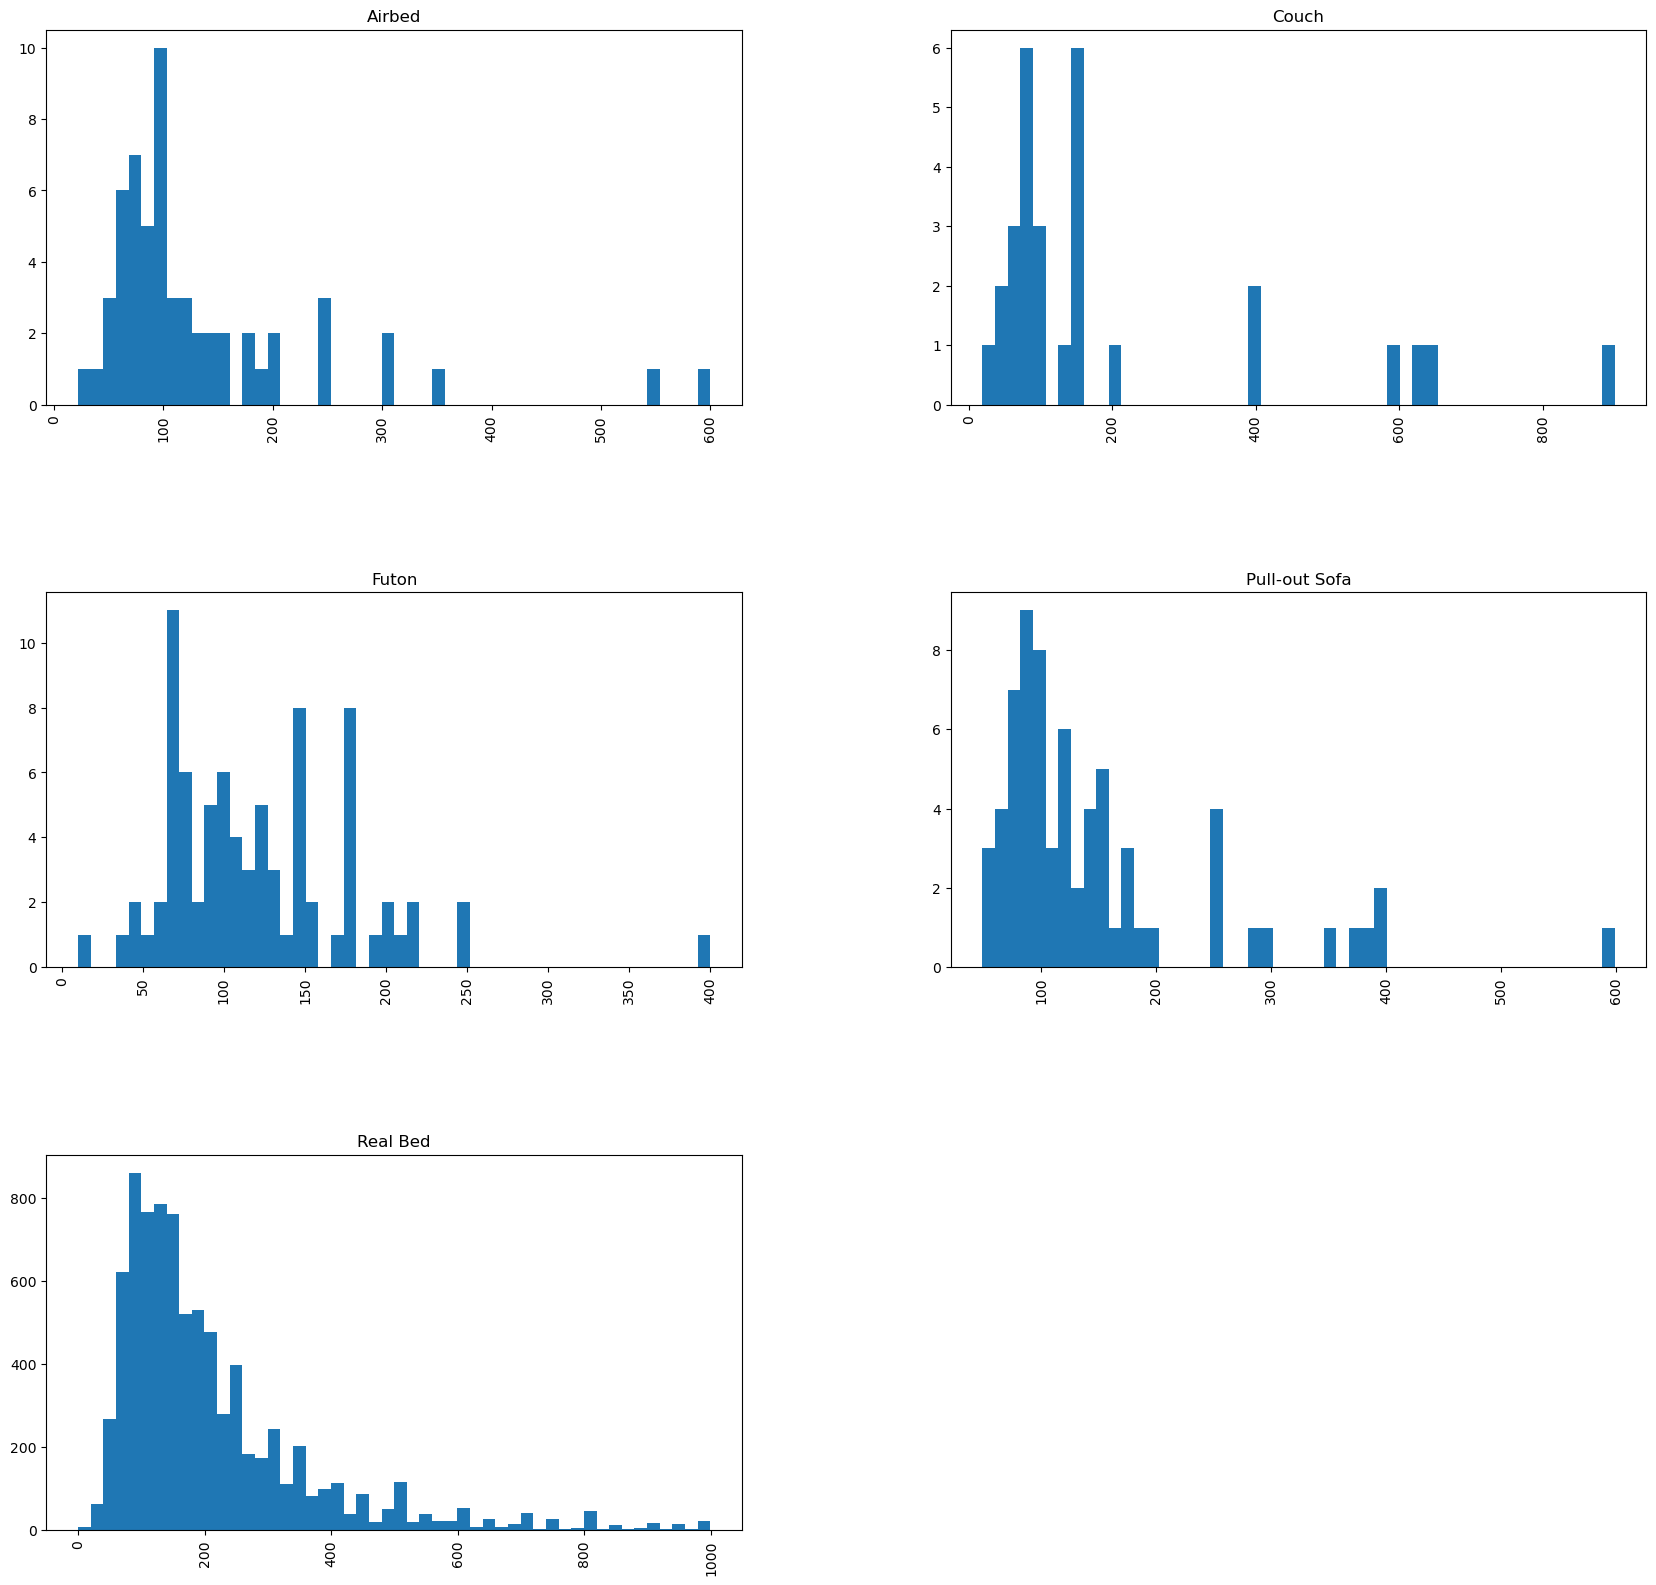

In [109]:
# make multiple histograms of listing prices grouped by bed type
sanfran.hist(column = 'Price', by = 'Bed Type', bins = 50, figsize = (20, 20))

# save image as a file
plt.savefig('Histogram of Listing Prices by Bed Type.png')

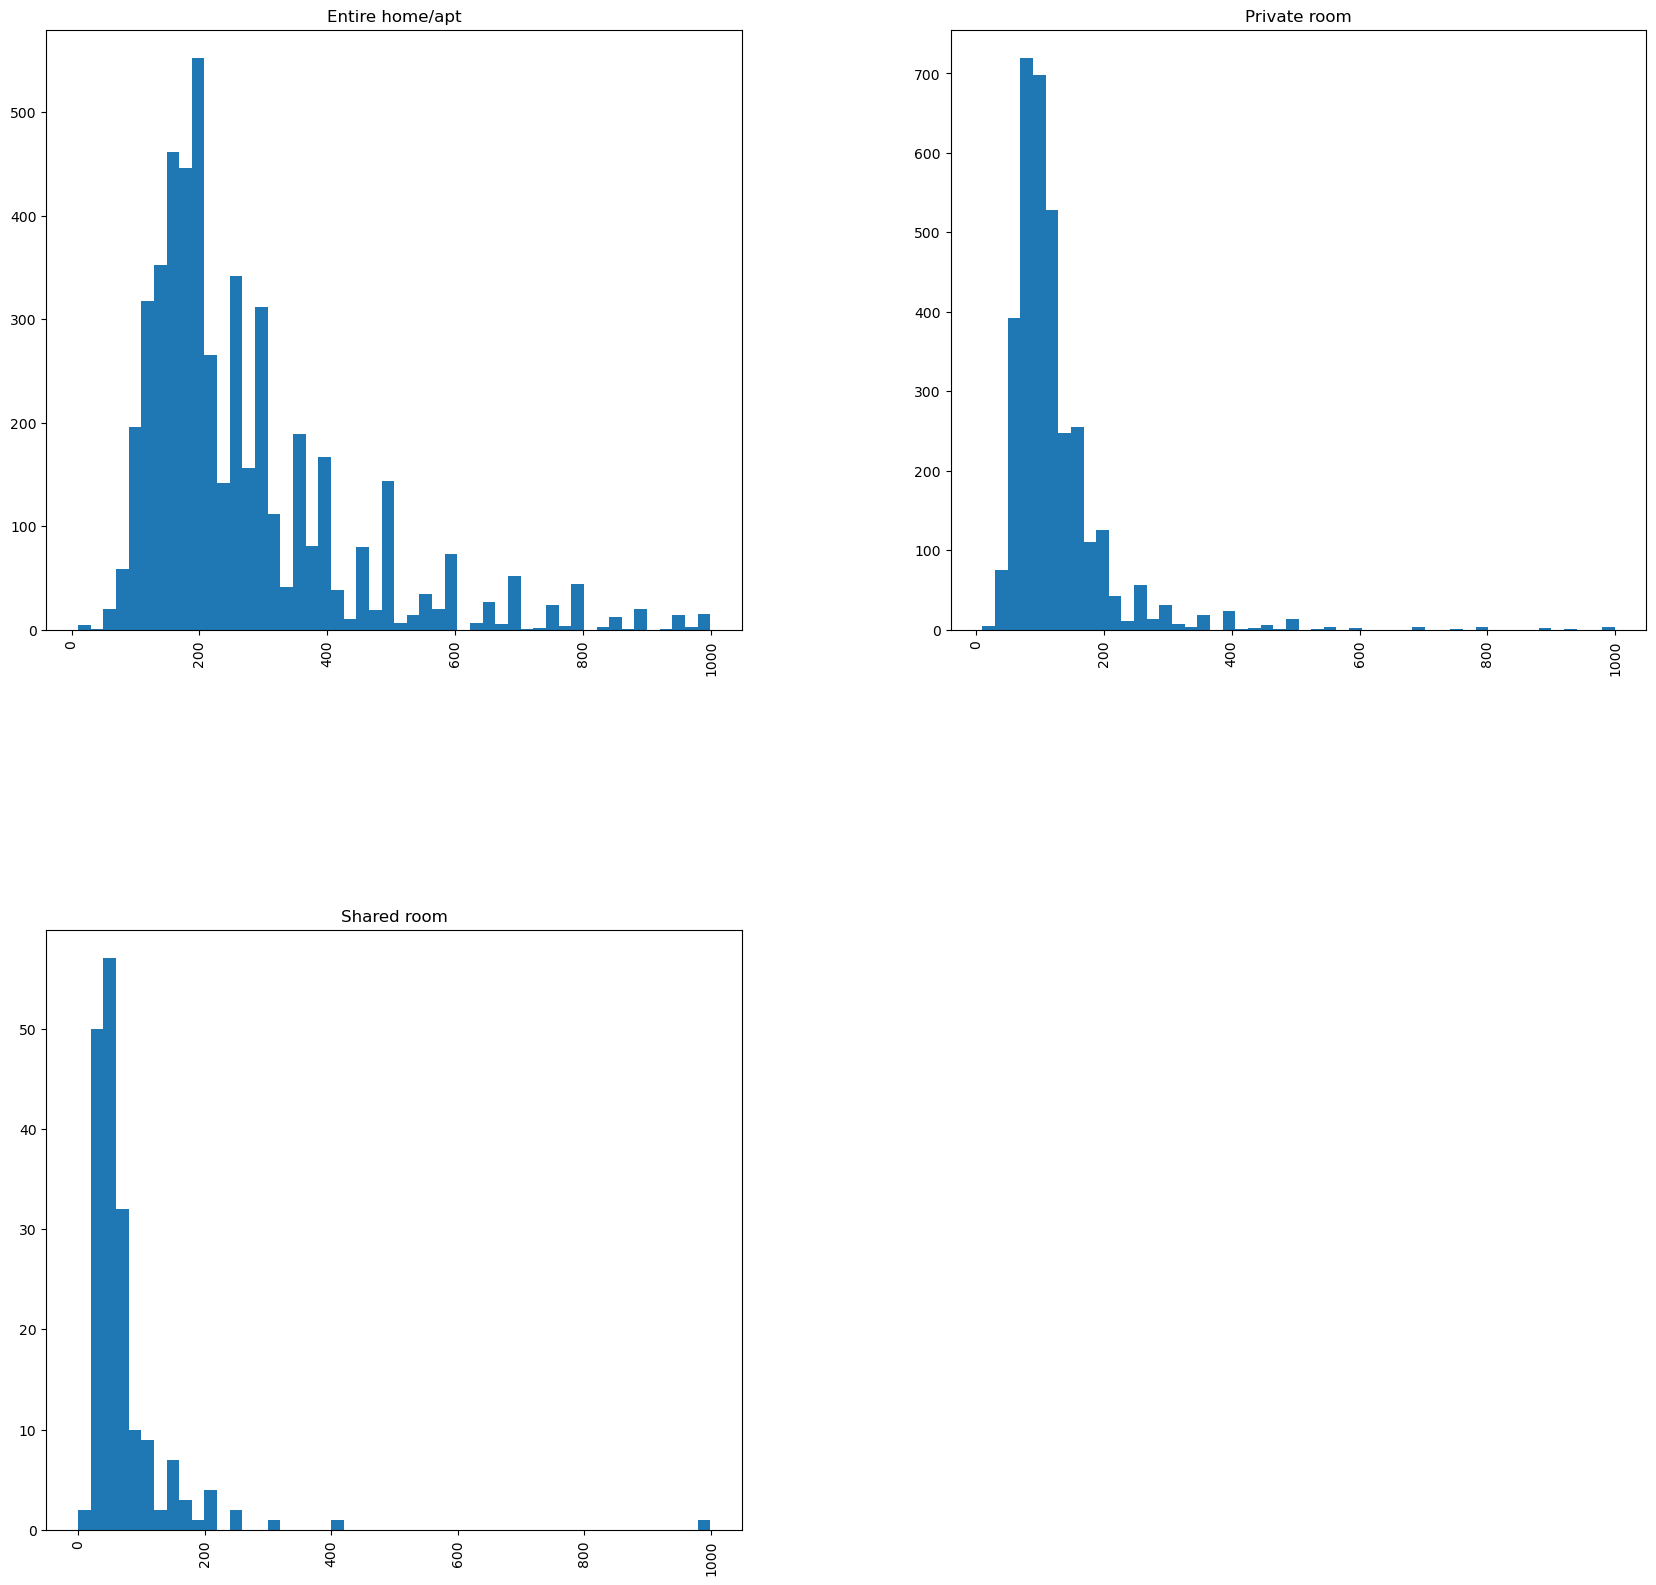

In [110]:
# make multiple histograms of listing prices grouped by room type
sanfran.hist(column = 'Price', by = 'Room Type', bins = 50, figsize = (20, 20))

# save image as a file
plt.savefig('Histogram of Listing Prices by Room Type.png')

In [36]:
# find the shared room with the highest price and show only the top 5 results
sanfran[sanfran['Room Type'] == 'Shared room'].sort_values(by = 'Price', ascending = False).head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
4404,12812551,https://www.airbnb.com/rooms/12812551,20170401232214,2017-04-02,i don't know how to delete my listing,"Please do not book it, coz I don't know how to...",NaN,"Please do not book it, coz I don't know how to...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4f78934f-c...,https://a0.muscache.com/im/pictures/4f78934f-c...,https://userclub.opendatasoft.com/api/explore/...,https://a0.muscache.com/im/pictures/4f78934f-c...,69865306,https://www.airbnb.com/users/show/69865306,Fai,2016-05-01,US,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/877216c9-3...,https://a0.muscache.com/im/pictures/877216c9-3...,Western Addition/NOPA,1.00,1.00,"email,phone","Western Addition/NOPA, San Francisco, CA 94115...",Western Addition/NOPA,Western Addition,NaN,San Francisco,CA,94115,San Francisco,"San Francisco, CA",US,United States,37.78,-122.43,Other,Shared room,1,1.00,1.00,16.00,Real Bed,"translation missing: en.hosting_amenity_49,tra...",NaN,999.00,NaN,NaN,NaN,NaN,1,0,1,1125,8 months ago,NaN,24,54,83,83,2017-04-02,1,2016-05-02,2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN FRANCISCO,strict,1,0.09,"37.78195752571553, -122.43374946563885","Host Has Profile Pic,Is Location Exact"
2690,4347535,https://www.airbnb.com/rooms/4347535,20170401232214,2017-04-02,Great apartment in Lower Haight,This is a lovely 1bd apartment right in the mi...,It was recently renovated and has a very nice ...,This is a lovely 1bd apartment right in the mi...,none,(URL HIDDEN) https://www.airbnb.com/locations/...,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/54600701/3...,https://a0.muscache.com/im/pictures/54600701/3...,https://userclub.opendatasoft.com/api/explore/...,https://a0.muscache.com/im/pictures/54600701/3...,3344775,https://www.airbnb.com/users/show/3344775,Thomas,2012-08-22,"San Francisco, California, United States",I'm a 26 year old from San Francisco. I curren...,NaN,NaN,NaN,https://a0.muscache.com/im/users/3344775/profi...,https://a0.muscache.com/im/users/3344775/profi...,Lower Haight,1.00,1.00,"email,phone,facebook,reviews,jumio","Lower Haight, San Francisco, CA 94117, United ...",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.77,-122.44,Apartment,Shared room,1,1.00,1.00,1.00,Couch,"TV,Wireless Internet,Smoke detector,Essentials",NaN,400.00,NaN,NaN,NaN,NaN,1,0,1,1125,30 months ago,NaN,0,0,0,0,2017-04-02,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN FRANCISCO,flexible,1,NaN,"37.770644167491284, -122.43645212852987","Host Has Profile Pic,Host Identity Verified,Is..."
4170,14500176,https://www.airbnb.com/rooms/14500176,20170401232214,2017-04-02,"Modern, Spacious condo in Mission Dolores",This condo is located in the hea

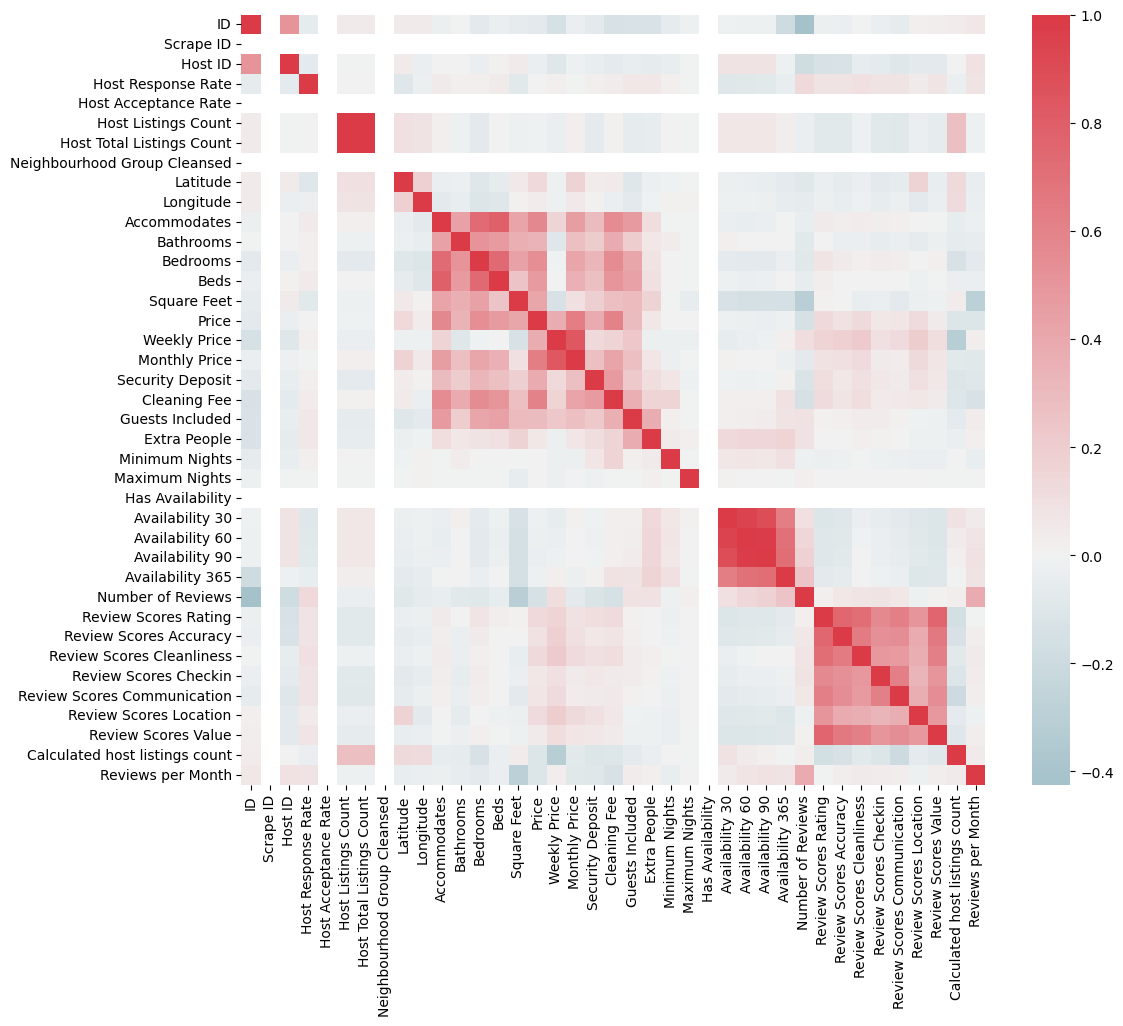

<Figure size 640x480 with 0 Axes>

In [111]:
# Correlation matrix to determine which variables are most correlated with price
plt.figure(figsize=(12,10))
cor = sanfran.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, annot=False, cmap=cmap, center=0)
plt.show()

# save image to file
plt.savefig('correlation_matrix_new.png')

In [137]:
## Use TfidfVectorizer to convert the text data to a matrix of TF-IDF features
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Prepare data for text analysis
sanfran2 = sanfran.dropna(subset=['Description'])

# Helper function to check if a given text is English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [138]:
# Remove non-English listings
sanfran_eng = sanfran2[sanfran2['Description'].apply(is_english)]

# Subset sanfran3 to only include the columns we need
sanfran_eng = sanfran_eng[['Price', 'Description', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Number of Reviews', 'Review Scores Rating', 'Reviews per Month', 'Availability 365']]

# Create a new data frame with dropped NA values
sanfran_eng = sanfran_eng.dropna()

# Preprocess and convert the text data 
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(sanfran_eng['Description'])

# Standardize the numerical data
scaler = StandardScaler()
X_non_text = scaler.fit_transform(sanfran_eng[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Number of Reviews', 'Review Scores Rating', 'Reviews per Month', 'Availability 365']])

# Combine the text and numerical data
X = hstack([X_text, X_non_text])

In [153]:
# Impute missing values for numerical columns
# subset data for english descriptions and only include the columns we need
sanfran_eng_imp = sanfran2[sanfran2['Description'].apply(is_english)]
sanfran_eng_imp = sanfran_eng_imp[['Price', 'Description', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Number of Reviews', 'Review Scores Rating', 'Reviews per Month', 'Availability 365']]
# impute missing values based on median
sanfran_eng_imp['Bathrooms'] = sanfran_eng_imp['Bathrooms'].fillna(sanfran3['Bathrooms'].median())
sanfran_eng_imp['Bedrooms'] = sanfran_eng_imp['Bedrooms'].fillna(sanfran3['Bedrooms'].median())
sanfran_eng_imp['Beds'] = sanfran_eng_imp['Beds'].fillna(sanfran3['Beds'].median())
sanfran_eng_imp['Guests Included'] = sanfran_eng_imp['Guests Included'].fillna(sanfran3['Guests Included'].median())
sanfran_eng_imp['Number of Reviews'] = sanfran_eng_imp['Number of Reviews'].fillna(sanfran3['Number of Reviews'].median())
sanfran_eng_imp['Review Scores Rating'] = sanfran_eng_imp['Review Scores Rating'].fillna(sanfran3['Review Scores Rating'].median())
sanfran_eng_imp['Reviews per Month'] = sanfran_eng_imp['Reviews per Month'].fillna(sanfran3['Reviews per Month'].median())
sanfran_eng_imp['Availability 365'] = sanfran_eng_imp['Availability 365'].fillna(sanfran3['Availability 365'].median())

# drop NA values from price column
sanfran_eng_imp = sanfran_eng_imp.dropna(subset=['Price'])

# Preprocess and convert the text data 
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(sanfran_eng_imp['Description'])

# Standardize the numerical data
scaler = StandardScaler()
X_non_text = scaler.fit_transform(sanfran_eng_imp[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Number of Reviews', 'Review Scores Rating', 'Reviews per Month', 'Availability 365']])

# Combine the text and numerical data
X_imp = hstack([X_text, X_non_text])

In [154]:
## Define variables for modeling with dropped NA values
# Define the target variable
y = sanfran_eng['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Define variables for modeling with imputed values
# Define the target variable for imputed data
y_imp = sanfran_eng_imp['Price']

# Split the data into training and testing sets for imputed data
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.25, random_state=123)

## Logistic regression model

In [149]:
## Create a logistic regression price prediction model with 
## data that has missing values removed
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = np.mean(abs(y_pred - y_test))
print(mae)

61.27155963302752


In [156]:
# Repeat the process for dataframe with imputed values
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imp, y_train_imp)

# Make predictions on the test set
y_pred_imp = model.predict(X_test_imp)

# Calculate mean absolute error
mae_imp = np.mean(abs(y_pred_imp - y_test_imp))
print(mae_imp)

74.28943628612032


## MLP regression model

In [157]:
# Train a MLP regression model with data that has missing values removed
model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = np.mean(abs(y_pred - y_test))
print(mae)

66.28502157954615


In [158]:
# Repeat the process for dataframe with imputed values
# Train a MLP regression model
model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(X_train_imp, y_train_imp)

# Make predictions on the test set
y_pred_imp = model.predict(X_test_imp)

# Calculate mean absolute error
mae_imp = np.mean(abs(y_pred_imp - y_test_imp))
print(mae_imp)

92.67348328856839


## XGBoost Model

In [164]:
# Train a XGB regression model with data that has missing values removed
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = np.mean(abs(y_pred - y_test))
print(mae)

54.41562937465283


In [165]:
# Repeat the process for dataframe with imputed values
# Train a XGB regression model
model = XGBRegressor()
model.fit(X_train_imp, y_train_imp)

# Make predictions on the test set
y_pred_imp = model.predict(X_test_imp)

# Calculate mean absolute error
mae_imp = np.mean(abs(y_pred_imp - y_test_imp))
print(mae_imp)

68.78145013155952


In [166]:
# create a dataframe with the actual and predicted prices from XGB model
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# calculate the difference between the actual and predicted prices
results['Difference'] = results['Actual'] - results['Predicted']

# calculate the difference divided by the actual price
results['Difference %'] = results['Difference']/results['Actual']
# take the absolute value of the percent difference
results['Abs Difference %'] = results['Difference %'].abs()

# print the first 20 rows of the dataframe
results.head(20)

,Actual,Predicted,Difference,Difference %,Abs Difference %
8148,195.00,181.30,13.70,0.07,0.07
1403,155.00,98.58,56.42,0.36,0.36
4366,175.00,178.14,-3.14,-0.02,0.02
5659,139.00,73.11,65.89,0.47,0.47
5076,110.00,121.80,-11.80,-0.11,0.11
944,250.00,361.15,-111.15,-0.44,0.44
8168,350.00,298.60,51.40,0.15,0.15
2202,199.00,569.63,-370.63,-1.86,1.86
5974,150.00,130.74,19.26,0.13,0.13
5760,80.00,83.35,-3.35,-0.04,0.04


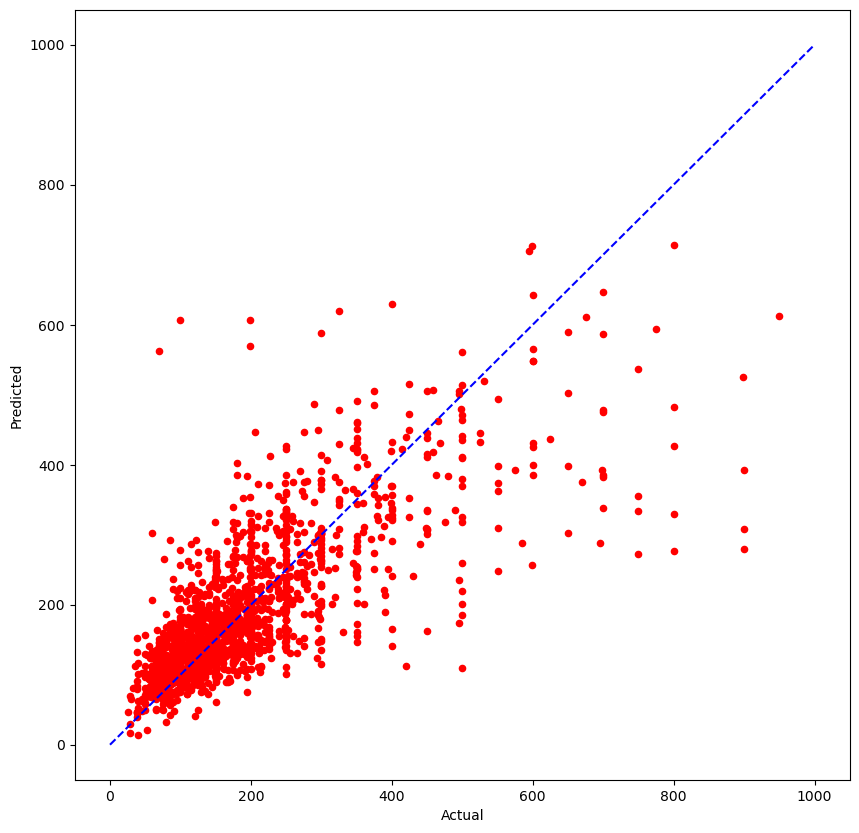

In [168]:
# make a scatter plot of the actual and predicted prices
results.plot(kind='scatter', x='Actual', y='Predicted', figsize=(10, 10), color='red')

# add density lines
# sns.kdeplot(results['Actual'], results['Predicted'], shade=True, shade_lowest=False)

# add a line showing the perfect prediction
plt.plot([0, 1000], [0, 1000], '--', color='blue')


<AxesSubplot: ylabel='Frequency'>

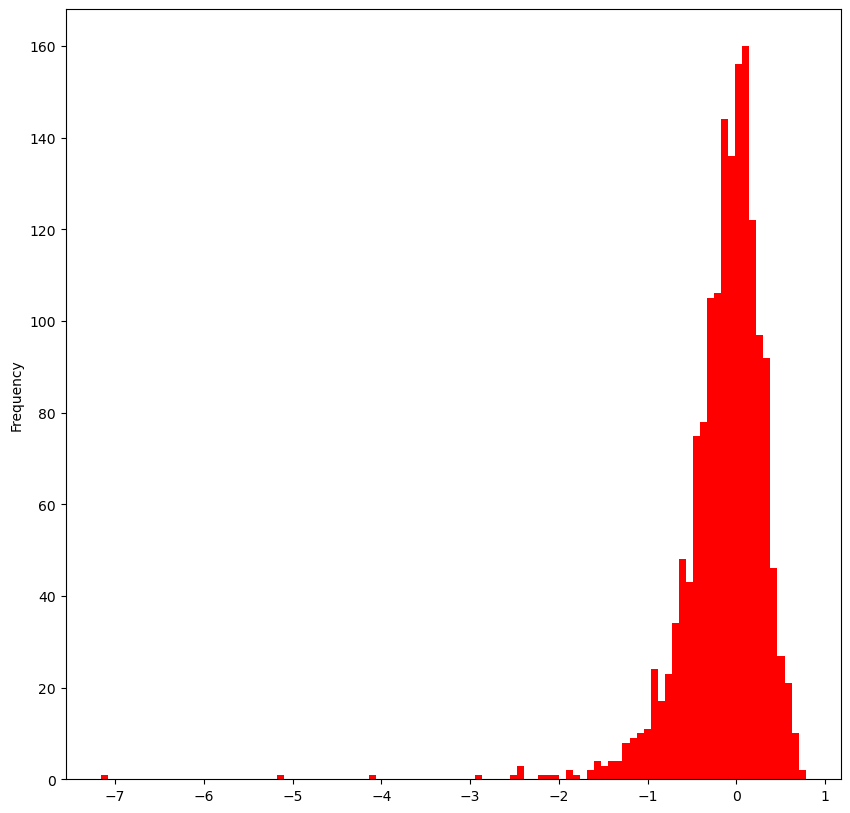

In [169]:
# make a histogram of the percentage difference between the actual and predicted prices
results['Difference %'].plot(kind='hist', bins=100, figsize=(10, 10), color='red')

<AxesSubplot: >

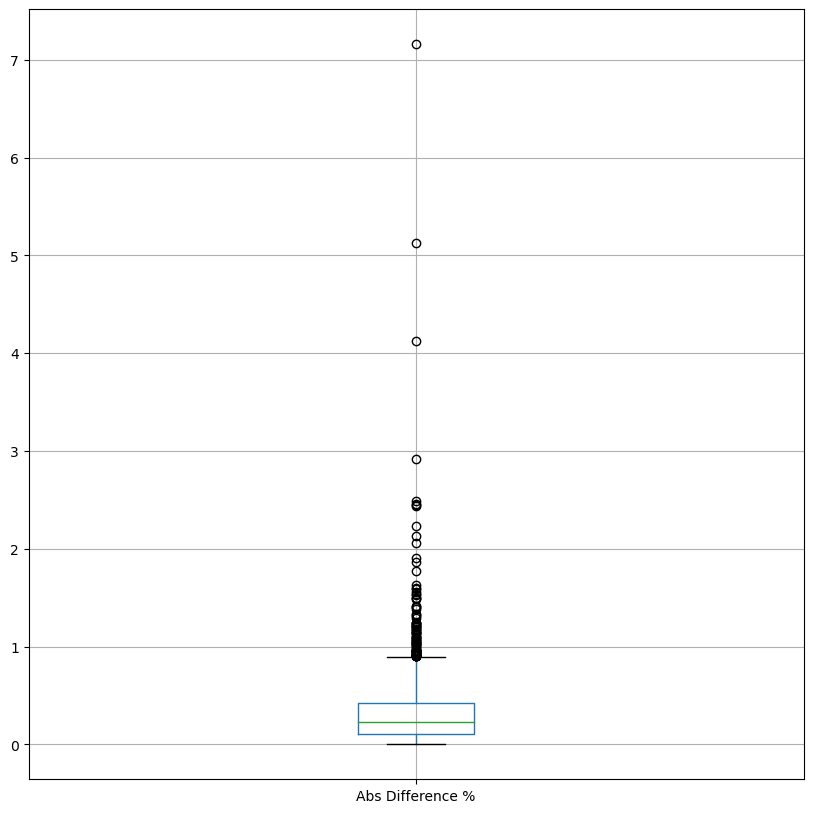

In [170]:
# make a boxplot of the percentage difference between the actual and predicted prices
results.boxplot(column=['Abs Difference %'], figsize=(10, 10))

In [171]:
# find the rows where the difference is greater than 100%
outliers = results[results['Abs Difference %'] > 1]

# print the number of rows
print(outliers.shape)

(65, 5)


In [172]:
# find the top 5 rows with the largest absolute percent difference
outliers.nlargest(15, 'Abs Difference %')

,Actual,Predicted,Difference,Difference %,Abs Difference %
1949,69.00,562.93,-493.93,-7.16,7.16
5542,99.00,606.43,-507.43,-5.13,5.13
102,59.00,302.50,-243.50,-4.13,4.13
4393,39.00,152.74,-113.74,-2.92,2.92
7606,38.00,132.74,-94.74,-2.49,2.49
333,77.00,265.93,-188.93,-2.45,2.45
3739,60.00,206.84,-146.84,-2.45,2.45
3846,85.00,292.49,-207.49,-2.44,2.44
1377,35.00,113.04,-78.04,-2.23,2.23
218,50.00,156.68,-106.68,-2.13,2.13


In [173]:
sanfran.iloc[1949, :]

ID                                                                         11442093
Listing Url                                   https://www.airbnb.com/rooms/11442093
Scrape ID                                                            20170401232214
Last Scraped                                                    2017-04-02 00:00:00
Name                              Startup Basecamp,org The First Startup Hotel (#2)
Summary                           We are much more than just an affordable, qual...
Space                             This listing price is for Double Occupancy Roo...
Description                       We are much more than just an affordable, qual...
Experiences Offered                                                            none
Neighborhood Overview             Startup Basecamp is conveniently located in th...
Notes                                                                           NaN
Transit                                                                     